<a href="https://colab.research.google.com/github/Gcc3186/Data-science-portfolio/blob/main/Uploading_HRRR_NPS_locations_and_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This cell will upload python libraries.

In [ ]:
%matplotlib inline

import pandas as pd
import io

## Downloading files containing NPs information and creating pandas dataframe

Method 1) Import files from local machine

In [ ]:
from google.colab import files
uploaded = files.upload()

Upload text file as pandas dataframe with method 1

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['NPS_points.csv']))
df.head()

Method 2) Mount google drive account

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Upload text file as pandas dataframe with method 2

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPS_points.csv')
df.head()

,UNIT_CODE,UNIT_NAME,Latitude,Longitude
0,CEBE,Cedar Creek and Belle Grove National Historica...,38.9984,-78.3099
1,CEBE,Cedar Creek and Belle Grove National Historica...,39.0248,-78.3027
2,LIBI,Little Bighorn Battlefield National Monument,45.5239,-107.3830
3,CAVO,Capulin Volcano National Monument,36.7773,-103.9750
4,TUZI,Tuzigoot National Monument,34.7801,-112.0210


## Reading NPs information and plotting in a map

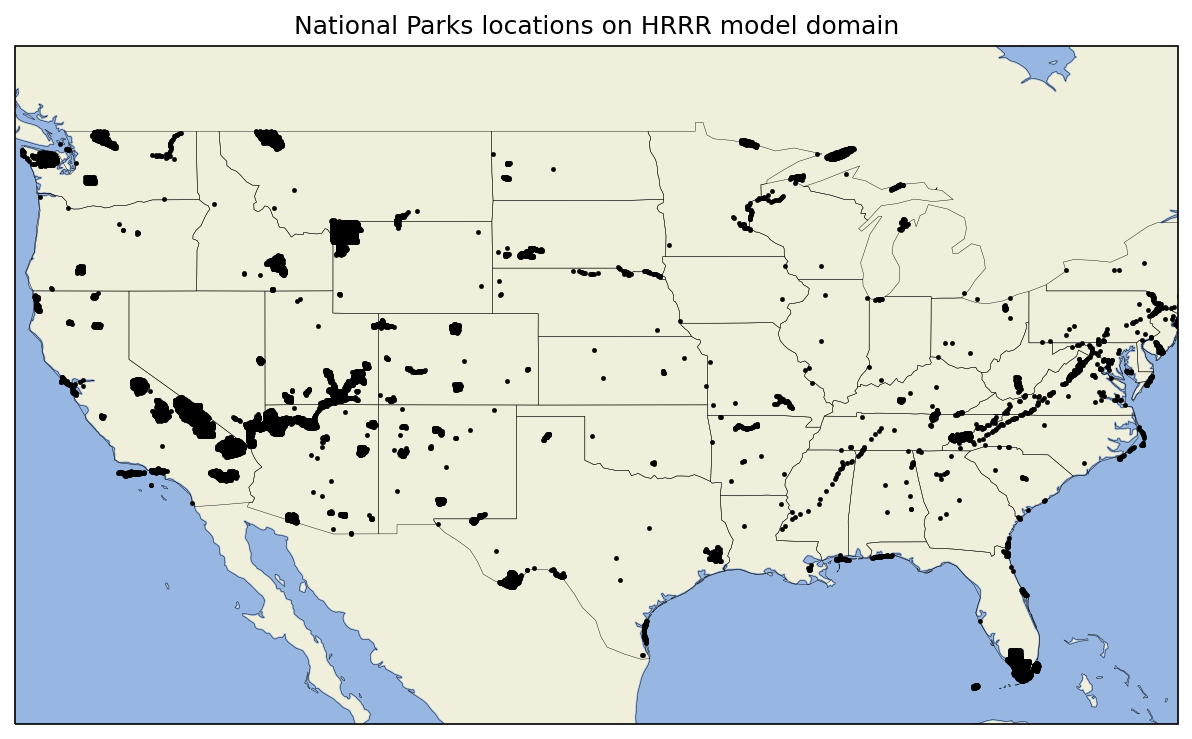

In [ ]:
# !pip install -U -q cartopy
# !pip install shapely --no-binary shapely

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

fig = plt.figure(figsize=(10,8),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
# add_subplot(1,1,1, projection=ccrs.LambertConformal())
# ax.coastlines()


ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE,linewidth=0.2)
ax.add_feature(cfeat.STATES.with_scale('110m'), linestyle='-',linewidth=0.2, edgecolor='black')

ax.set_extent([-125,-74,23,50])

ax.set_title('National Parks locations on HRRR model domain')
cf = ax.scatter(df.Longitude,df.Latitude,s=5,c='black',transform=ccrs.PlateCarree(),cmap='spring',edgecolor='black',linewidth=0.1,vmin=290,vmax=300,zorder=1)
